In [2]:
#Riley Estes
#EE399 HW2
#4/16/2023
#https://github.com/rileywe/Yalefaces-analysis

In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loads data
results=loadmat('yalefaces.mat')
X=results['X']
print(np.shape(X))

(1024, 2414)


In [5]:
#normalizes the data to have the same mean = 0 and stdev = 1
means = np.mean(X, axis=0)
stddevs = np.std(X, axis=0)
X = (X - means) / stddevs
print(np.shape(X))
print(np.mean)

(1024, 2414)
<function mean at 0x00000210F940EB90>


In [6]:
#gets the first 100 faces
X100 = X[:, :100]
#creates a correlation matrix of the first 100 faces normalized between -1 and 1
c = np.dot(X100.T, X100) / 1024
print(np.shape(c))

(100, 100)


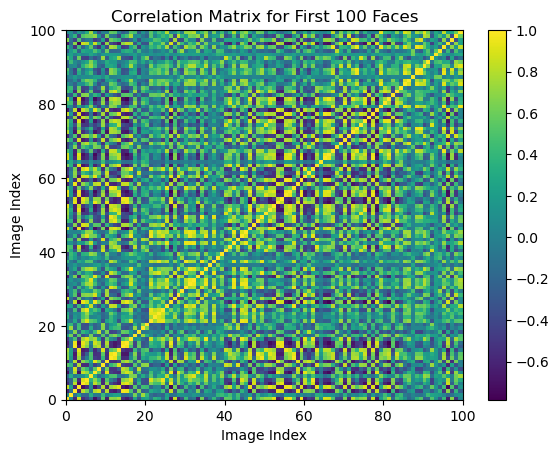

In [7]:
#displays the correlation matrix
plt.pcolor(c)
plt.title("Correlation Matrix for First 100 Faces")
plt.xlabel("Image Index")
plt.ylabel("Image Index")
plt.colorbar()

In [8]:
#removes the diagonal correlations so they are not considered when finding the most correlated two images
#this is because correlations on the diagonal are all 1 because an image is 100% correlated with itself
cNoDiag = np.copy(c)
np.fill_diagonal(cNoDiag, 0.5)
max = np.argmax(cNoDiag)
min = np.argmin(cNoDiag)
#finds the maximum and minimum correlated face pairs
print("The maximum correlation is between images ", int(max/100) + 1, " and ", max%100 + 1, " with a value of ", c[int(max/100), int(max%100)])
print("While the minimum correlation is between images ", int(min/100) + 1, " and ", min%100 + 1, " with a value of ", c[int(min/100), int(min%100)])
print("Note that this excludes the correlation between an image and itself, which is always 1")

The maximum correlation is between images  6  and  63  with a value of  0.9710984631450812
While the minimum correlation is between images  16  and  82  with a value of  -0.7840280171025154
Note that this excludes the correlation between an image and itself, which is always 1


Most correlated images in the first 100 images:


Text(0.5, 1.0, 'Image 63')

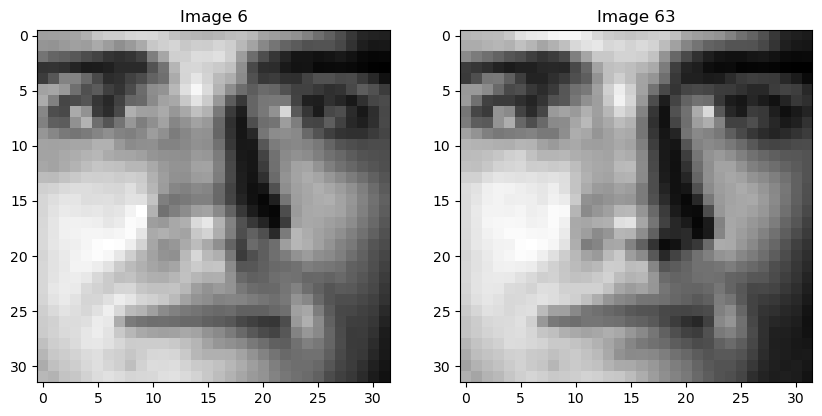

In [9]:
#displays the face pairs found in the last cell
print("Most correlated images in the first 100 images:")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(X[:, int(max/100)].reshape(32, 32), cmap='gray')
axs[0].set_title("Image " + str(int(max/100) + 1))


axs[1].imshow(X[:, int(max%100)].reshape(32, 32), cmap='gray')
axs[1].set_title("Image " + str(int(max%100) + 1))

Least correlated images in the first 100 images:


Text(0.5, 1.0, 'Image 82')

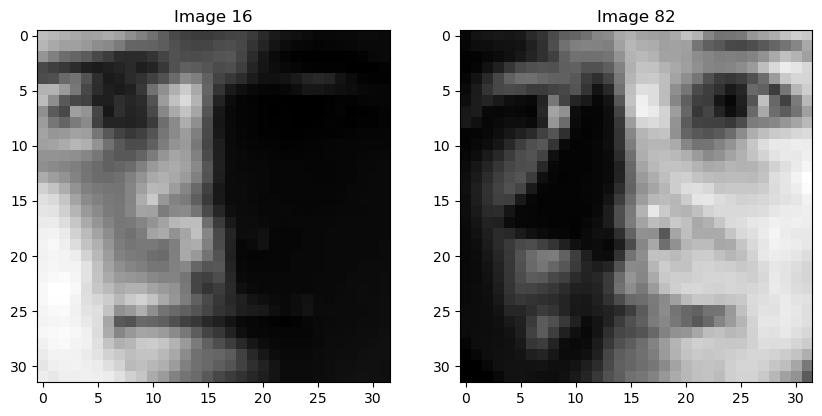

In [10]:
print("Least correlated images in the first 100 images:")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(X[:, int(min/100)].reshape(32, 32), cmap='gray')
axs[0].set_title("Image " + str(int(min/100) + 1))


axs[1].imshow(X[:, int(min%100)].reshape(32, 32), cmap='gray')
axs[1].set_title("Image " + str(int(min%100) + 1))

In [11]:
#finds the normalized -1 to 1 correlation matrix for a select set of 10 faces
indices = np.array([0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004])
X10 = X[:, indices]

c10 = np.dot(X10.T, X10) / 1024
print(np.shape(c10))

(10, 10)


Face numbers: 
[   1  313  512    5 2400  113 1024   87  314 2005]


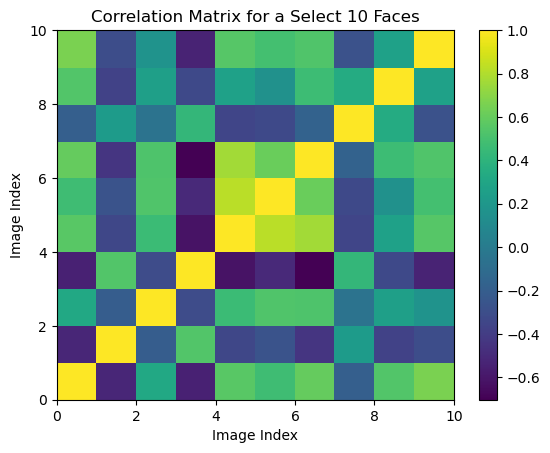

In [12]:
#displays the 10x10 correlation matrix
#note that the indices are 1 less than the number of the face in the dataset
plt.pcolor(c10)
plt.title("Correlation Matrix for a Select 10 Faces")
plt.xlabel("Image Index")
plt.ylabel("Image Index")
plt.colorbar()
print("Face numbers: ")
print(indices + 1)

In [13]:
#finds the six greatest eigenvalues and their associated eigenvectors using the matrix Y = XX^T
Y = X.dot(X.T)
print(np.shape(Y))

eigvals, eigvecs = np.linalg.eig(Y)
#gets a matrix that would sort the absolute values of the eigenvalues from least to greatest then flips it
#takes the first 6 values as the indices of the greatest 6 eigenvalues
greatest = np.flip(np.argsort(np.abs(eigvals)))[:6]
#uses these indices to find the corresponding eigenvectors
greatestEVecs = eigvecs[:, greatest]
print(np.shape(greatestEVecs))


(1024, 1024)
(1024, 6)


In [14]:
#finds the first 6 principle component directions from the SVD of X
u, s, vt = np.linalg.svd(X)
PCDirs = vt[:6, :]
print(np.shape(PCDirs))

(6, 2414)


In [15]:
#compares the normalized difference of the absolute values of the 1st eigenvector of Y and the first SVD mode from u
diff_norm = np.linalg.norm(np.abs(eigvecs[:, 0]) - np.abs(u[:, 0]))
print("Normalized difference of the absolute values of the first eigenvector in Y and the first mode from the SVD of X: ")
print(diff_norm)

Normalized difference of the absolute values of the first eigenvector in Y and the first mode from the SVD of X: 
8.806729017063308e-16


In [16]:
#Finds the total variance in the SVD using the s matrix
totalVar = np.sum(s**2)
#determines the percent of the total variance of each of the first 6 modes
varPercents = (s**2 / totalVar)[:6] * 100
for i in range(0, len(varPercents)):
    print("SVD mode " + str(i) + " is " + str(np.round(varPercents[i], 3)) + "% of the total variance.")

SVD mode 0 is 39.159% of the total variance.
SVD mode 1 is 18.854% of the total variance.
SVD mode 2 is 7.704% of the total variance.
SVD mode 3 is 4.889% of the total variance.
SVD mode 4 is 2.342% of the total variance.
SVD mode 5 is 2.035% of the total variance.


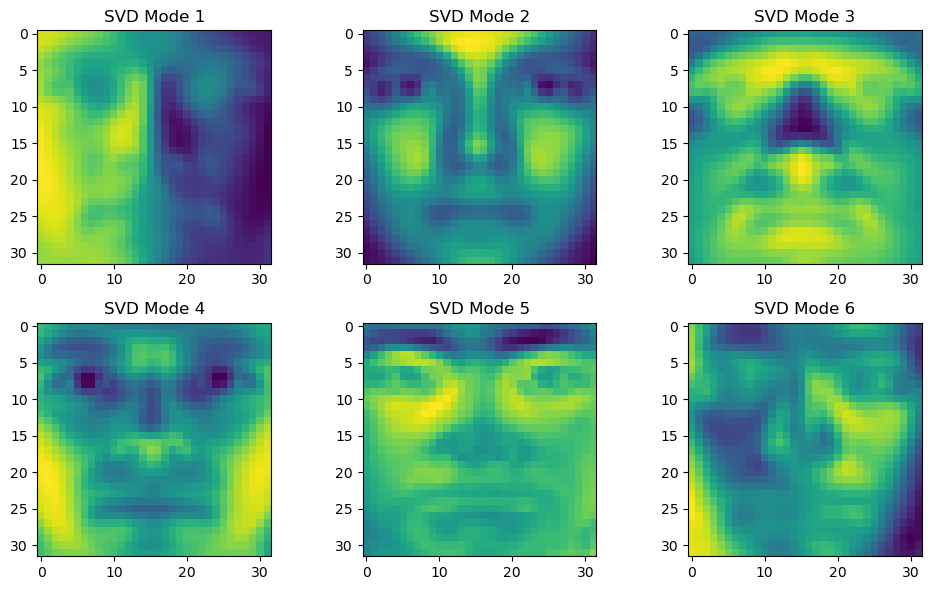

In [17]:
#displays the first 6 modes reshaped into images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
axes[0, 0].imshow(u[:, 0].reshape(32, 32))
axes[0, 0].set_title("SVD Mode 1")
axes[0, 1].imshow(u[:, 1].reshape(32, 32))
axes[0, 1].set_title("SVD Mode 2")
axes[0, 2].imshow(u[:, 2].reshape(32, 32))
axes[0, 2].set_title("SVD Mode 3")
axes[1, 0].imshow(u[:, 3].reshape(32, 32))
axes[1, 0].set_title("SVD Mode 4")
axes[1, 1].imshow(u[:, 4].reshape(32, 32))
axes[1, 1].set_title("SVD Mode 5")
axes[1, 2].imshow(u[:, 5].reshape(32, 32))
axes[1, 2].set_title("SVD Mode 6")
plt.tight_layout()